# Título: Análisis de grafos para fjujos migratorios

### Miembros: Pablo Revuelta Stobbs, Matías Corredoira

### Fecha: 15/01/2021

### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)

### Carga de base de datos

In [2]:
pathfile = '../data/migration_inflows.csv'

In [3]:
migration = pd.read_csv(pathfile)
migration.head()

,Origin,Destination,Year,Value,dist
0,AFG,AUT,2000,828.0,4568.098
1,AFG,AUT,2001,1539.0,4568.098
2,AFG,AUT,2002,1101.0,4568.098
3,AFG,AUT,2003,743.0,4568.098
4,AFG,AUT,2004,650.0,4568.098


Creación de variables pertenecientes a los rangos de distancia entre países y números de traslados entre los mismos. La división se dará en función de los valores quartílicos.

In [4]:
migration['valueGroup'] = migration['Value'].map(lambda x: 'value_1' if x <= 1.000000 else
                                                 ('value_2' if x <= 17.000000 else
                                                 ('value_3' if x <= 174.000000 else 'value_4')))
migration

,Origin,Destination,Year,Value,dist,valueGroup
0,AFG,AUT,2000,828.0,4568.0980,value_4
1,AFG,AUT,2001,1539.0,4568.0980,value_4
2,AFG,AUT,2002,1101.0,4568.0980,value_4
3,AFG,AUT,2003,743.0,4568.0980,value_4
4,AFG,AUT,2004,650.0,4568.0980,value_4
...,...,...,...,...,...,...
67455,FIN,LVA,2010,39.0,358.1294,value_3
67456,FIN,LVA,2014,48.0,358.1294,value_3
67457,FIN,LVA,2017,20.0,358.1294,value_3
67458,FIN,LVA,2018,38.0,358.1294,value_3


In [5]:
migration['distGroup'] = migration['dist'].map(lambda x: 'tramo_1' if x < 2814.554000 else
                                                 ('tramo_2' if x < 5931.603000 else
                                                 ('tramo_3' if x < 8629.263750 else 'tramo_4')))
migration

,Origin,Destination,Year,Value,dist,valueGroup,distGroup
0,AFG,AUT,2000,828.0,4568.0980,value_4,tramo_2
1,AFG,AUT,2001,1539.0,4568.0980,value_4,tramo_2
2,AFG,AUT,2002,1101.0,4568.0980,value_4,tramo_2
3,AFG,AUT,2003,743.0,4568.0980,value_4,tramo_2
4,AFG,AUT,2004,650.0,4568.0980,value_4,tramo_2
...,...,...,...,...,...,...,...
67455,FIN,LVA,2010,39.0,358.1294,value_3,tramo_1
67456,FIN,LVA,2014,48.0,358.1294,value_3,tramo_1
67457,FIN,LVA,2017,20.0,358.1294,value_3,tramo_1
67458,FIN,LVA,2018,38.0,358.1294,value_3,tramo_1


Filtrado para el año 2005 debido a a cantidad de datos de la que se dispone

In [6]:
migration_2005 = migration[(migration.Year == 2005)]
migration_2005.head()

,Origin,Destination,Year,Value,dist,valueGroup,distGroup
5,AFG,AUT,2005,652.0,4568.098,value_4,tramo_2
32,AFG,CZE,2005,12.0,4708.024,value_2,tramo_2
52,AFG,DNK,2005,233.0,4857.692,value_4,tramo_2
71,AFG,FIN,2005,264.0,4254.794,value_4,tramo_2
90,AFG,FRA,2005,151.0,5590.381,value_3,tramo_2


In [7]:
migration_2005.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3245 entries, 5 to 67450
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Origin       3245 non-null   object 
 1   Destination  3245 non-null   object 
 2   Year         3245 non-null   int64  
 3   Value        3245 non-null   float64
 4   dist         3088 non-null   float64
 5   valueGroup   3245 non-null   object 
 6   distGroup    3245 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 202.8+ KB


In [8]:
nodos = migration_2005[['Origin', 'Destination']].values
nodos

array([['AFG', 'AUT'],
       ['AFG', 'CZE'],
       ['AFG', 'DNK'],
       ...,
       ['BLR', 'LVA'],
       ['CAN', 'LVA'],
       ['FIN', 'LVA']], dtype=object)

In [9]:
lista_nodos = nx.from_edgelist(nodos)

In [10]:
len(lista_nodos.nodes()), len(lista_nodos.edges())

(206, 3070)

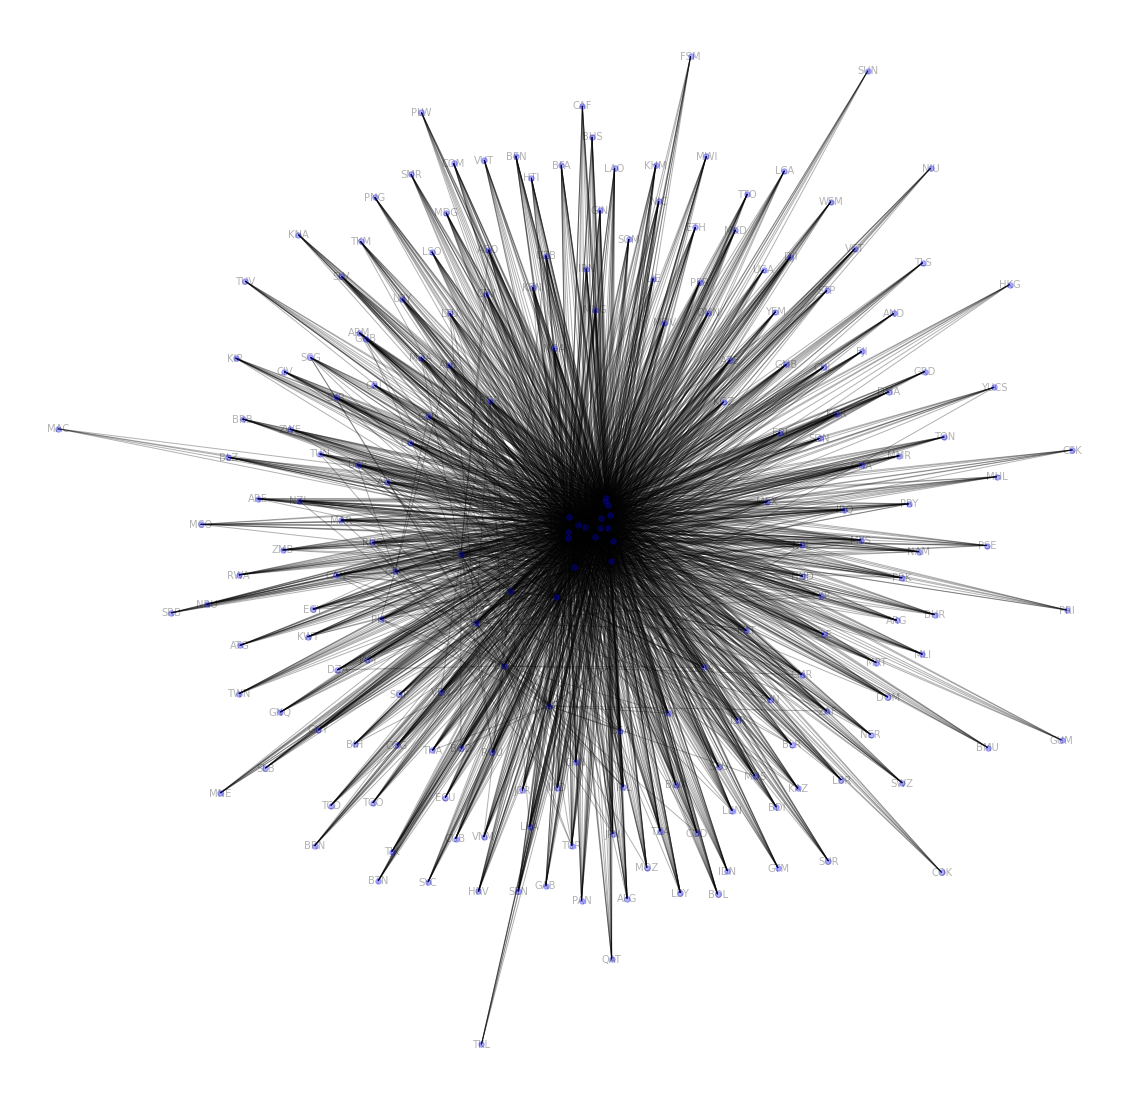

In [11]:
fig, ax = plt.subplots(1, 1, figsize = (20, 20))
nx.draw_networkx(lista_nodos,
                ax = ax,
                node_size = 30,
                font_size = 10,
                alpha = 0.3,
                width = 1,
                node_color = "b")
ax.set_axis_off()

En este grafo el centro lo conforman los países a los que generalmente se dirigen los migrantes, los cuales en su gran mayoría se encuentran en occidente. Esto sin embargo no ocurre con los de origin, por lo que podemos contemplar que hay una tendencia clara en cuanto a las direcciones elegidas por parte de la población.

Se puede observar una gran afluencia de migrantes hacia los paises de destino, por lo que en el centro se da una gran opacidad.


Se crea una matriz para representar las relaciones entre los países de origen y los valores de las migraciones.

In [12]:
cluster = nx.from_pandas_edgelist(migration, source='Origin', target='valueGroup')

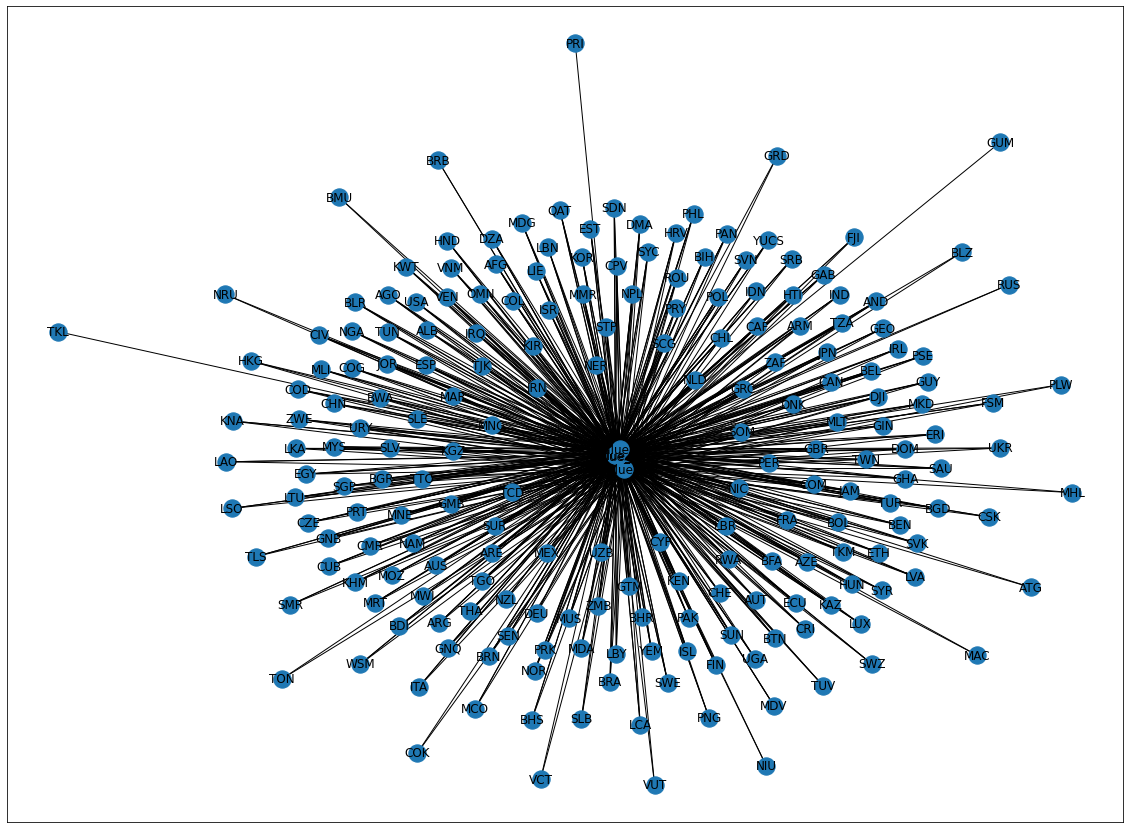

In [13]:
plt.figure(figsize = (20,15))
nx.draw_networkx(cluster)
plt.savefig("../data/map_1.png", format = "png", dpi = 300)
plt.show()

En primer lugar nos encontramos con un grafo de tipo asortivo en el que podemos localizar en el centro los distintos rangos de valores pertenecientes a las movilidades. Si se analizan esos nodos se podría ver cuales son los grupos de movilidad con un mayor peso.

Los que tienen un valor más elevado son nodos que tienen una mayor importancia, esto tiene sentido ya que son los países de destino.

In [14]:
degree_dict_value = dict(cluster.degree(cluster.nodes()))
nx.set_node_attributes(cluster, degree_dict_value, 'degree_Value')

In [15]:
print(cluster.nodes['value_1'],cluster.nodes['value_2'],cluster.nodes['value_3'],cluster.nodes['value_4'])

{'degree_Value': 202} {'degree_Value': 201} {'degree_Value': 187} {'degree_Value': 174}


Se observa que todos los nodos se aproximan en relación a du peso. Podemos comprobar que se da una mayor cantidad de migraciones con valores bajos ya que el peso para value_1 es mayor que para value_3 o value_4. 
Además también se observa un decrecimiento según aumenta aumenta el número de migraciones.

Vamos a realizar un grafo teniendo en cuenta la distancia recorrida desde el origen al destino, agrupandolos en 4 grupos. Se pretende observar si hay tendencias en los origenes a realizar viajes con mayor o menor distancia.

In [16]:
cluster_distGroup = nx.from_pandas_edgelist(migration, source='Origin', target='distGroup')

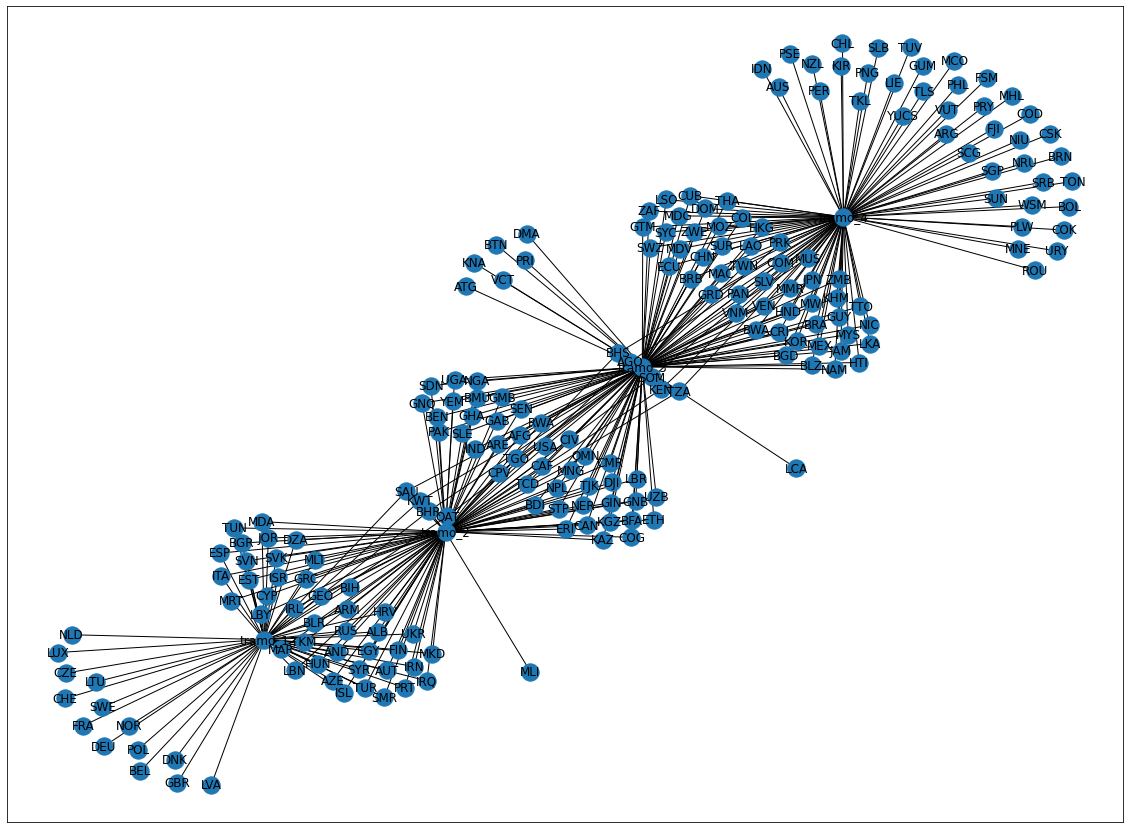

In [17]:
plt.figure(figsize = (20,15))
nx.draw_networkx(cluster_distGroup)
plt.savefig("../data/map_2.png", format = "png", dpi = 300)
plt.show()

In [18]:
degree_dict_distance = dict(cluster_distGroup.degree(cluster_distGroup.nodes()))
nx.set_node_attributes(cluster_distGroup, degree_dict_distance, 'degree_Distance')

In [19]:
print(cluster_distGroup.nodes['tramo_1'],cluster_distGroup.nodes['tramo_2'],cluster_distGroup.nodes['tramo_3'],cluster_distGroup.nodes['tramo_4'])

{'degree_Distance': 60} {'degree_Distance': 95} {'degree_Distance': 109} {'degree_Distance': 95}


Se comprueba en este caso que los nodos del tramo 3 poseen un mayor peso en relación al resto. El tramo con menor peso es el primero, el cual se aleja en gran medida del resto. Esto es debido a que la gente que migra con dinámica general busca obtener cambios drásticos en sus vidas, lo cual muchas veces difiere de buscar un destino cercano de donde se encuentran.

 Se crea una matriz para representar las relaciones entre los paises de destino y las cantidades de migración.

In [20]:
cluster_valueGroup = nx.from_pandas_edgelist(migration_2005, source='Destination', target='valueGroup')

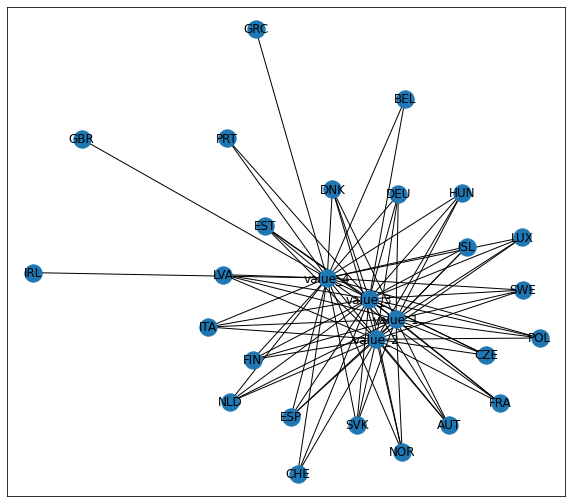

In [21]:
plt.figure(figsize = (10,9))
nx.draw_networkx(cluster_valueGroup)
plt.savefig("../data/map_3.png", format = "png", dpi = 300)
plt.show()

Se puede comprobar que para el año 2005 la mayoría de países de destino poseen rangos de migraciones entre paises muy amplios. Solo en el caso de Grecia, Irlanda y Gran Bretaña la cantidad de migrantes allegados solo se encuentra en uno de los tramos, que se trata de value_4. Esto no tiene por que ser un indicativo de que reciben un número de personas menor, sino que cuando reciben personas, estas solo se encuentran dentro de ese rango. 

Los países a los que generalmente decide trasladarse la población a pesar de ser muy dispares, se encuentran bastante concentrados si hablamos en términos relativos refiriendonos a occidente.

La distancia a recorrer no es un factor que generalmente modifique el comportamiento de la gente a la hora de elegir destino.

#### Referencias

__Datos__ 

 - https://stats.oecd.org/Index.aspx?DataSetCode=MIG
 - http://www.cepii.fr/cepii/en/bdd_modele/presentation.asp?id=6

__Grafos__
 - https://networkx.org/
 - http://micaminomaster.com.co/grafo-algoritmo/todo-trabajar-grafos-python/
 - https://www.ellaberintodefalken.com/2020/02/grafos-con-networkx.html
 - https://graphviz.readthedocs.io/en/stable/manual.html
 - http://metrocosm.com/global-immigration-map/
 - https://rdrr.io/cran/cepiigeodist/man/dist_cepii.html
 - https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python